In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy
import matplotlib
import pandas as pd
import scipy
from scipy.spatial import distance
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn import linear_model
from sklearn import neighbors
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from imutils import paths
import os
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
import cv2
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
import gym
import time
from IPython.display import clear_output

%matplotlib inline

In [2]:
epsilon = 0.1 # Параметр эпсилон при использовании эпсилон жадной стратегии
gamma = 0.8 # Коэффциент дисконтирования гамма
random_seed = 7 #Random seed
time_delay = 0.02 # Задержка времени при отрисовке процесса игры после обучения (секунды)
lr_rate = 0.9 #Коэффициент скорости обучения альфа

In [3]:
def generate_random_map(size, p, sd):
    valid = False
    np.random.seed(sd)

    def is_valid(res):
        frontier, discovered = [], set()
        frontier.append((0,0))
        while frontier:
            r, c = frontier.pop()
            if not (r,c) in discovered:
                discovered.add((r,c))
                directions = [(1, 0), (0, 1), (-1, 0), (0, -1)]
                for x, y in directions:
                    r_new = r + x
                    c_new = c + y
                    if r_new < 0 or r_new >= size or c_new < 0 or c_new >= size:
                        continue
                    if res[r_new][c_new] == 'G':
                        return True
                    if (res[r_new][c_new] not in '#H'):
                        frontier.append((r_new, c_new))
        return False

    while not valid:
        p = min(1, p)
        res = np.random.choice(['F', 'H'], (size, size), p=[p, 1-p])
        res[0][0] = 'S'
        res[-1][-1] = 'G'
        valid = is_valid(res)
    return ["".join(x) for x in res]

In [4]:
random_map = generate_random_map(size=6, p=0.8, sd = random_seed) #Создаем свою карту
env = gym.make("FrozenLake-v0", desc=random_map, is_slippery=False) #Инициализируем среду
print("Ваша карта")
env.render() #Выводим карту на экран

Ваша карта

SFFFHF
FFFFFH
FFFHFF
HFFHFF
HFFFFF
FFFFFG


In [11]:
#с вероятностью 10% будет выбран случайный ход из 4
#с вероятностью 90% будет выбран самый оптимальный ход согласено алгоритму Q-обучения
def choose_action(state):
    action=0
    if np.random.uniform(0, 1) < epsilon:
        action = np.random.randint(0,env.action_space.n)
    else:
        action = np.random.choice(np.array(np.argwhere(Q[state, :] == np.amax(Q[state, :])).flatten().tolist()))
    return action

def learn(state, state2, reward, action, action2, done):
    if done:
        Q[state, action] += lr_rate*(reward - Q[state, action])
    else:
        Q[state, action] += lr_rate*(reward + gamma*Q[state2, action2] - Q[state, action])

In [12]:
from tqdm import tqdm

np.random.seed(random_seed)
total_games = 40000
max_steps = 100
wins = 0
V = []
states=[]

Q = np.zeros((env.observation_space.n, env.action_space.n))

for game in tqdm(range(total_games)):
    state = env.reset()
    t = 0
    f = False
    states=[]
    action = choose_action(state)
    while t < max_steps:
        t+=1
        state2, reward, done, info = env.step(action)
        action2 = choose_action(state2)
        
        if t == max_steps:
            done = True
            
        if done and reward == 1:
            f = True
        
        states.append(state)
        
        learn(state, state2, reward, action, action2, done)
        
        state = state2
        action = action2
        
        if done:
            break
    
    if f:
        wins+=1
        V.append(1)
    else:
        V.append(0)

100%|███████████████████████████████████████████████████████████████████████████| 40000/40000 [00:41<00:00, 961.51it/s]


In [13]:
print(wins)
print(V)

35770
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [121]:
states=[]
t = 0
state = env.reset()
wn = 0
while(t < 100):
    env.render()
    time.sleep(time_delay)
    clear_output(wait=True)
    action = choose_action(state)  
    state2, reward, done, info = env.step(action)  
    states.append(state)
    state = state2
    t += 1
    if done and reward == 1:
        wn=1
    if done:
        break
if wn == 1:
  print("!!!Победа!!!")

!!!Победа!!!


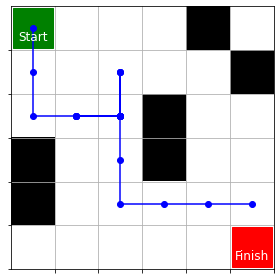

In [15]:
import matplotlib.pyplot as plt

def make_maze_pic(maze):
    maze_pic=[]
    for i in range(len(maze)):
        row = []
        for j in range(len(maze[i])):
            if maze[i][j] == 'S':
                row.append(0)
            if maze[i][j] == 'F':
                row.append(0)
            if maze[i][j] == 'H':
                row.append(1)
            if maze[i][j] == 'G':
                row.append(0)
        maze_pic.append(row)
    maze_pic = np.array(maze_pic)
    return maze_pic
  

maze_pic = make_maze_pic(random_map)
nrows, ncols = maze_pic.shape

rw = np.remainder(states,nrows)
cl = np.floor_divide(states,nrows)
#if wn == 1:
#    rw = np.append(rw, [nrows-1])
#    cl = np.append(cl,[ncols-1])

fig, ax1 = plt.subplots(1, 1, tight_layout=True)
ax1.clear()
ax1.set_xticks(np.arange(0.5, nrows, step=1))
ax1.set_xticklabels([])
ax1.set_yticks(np.arange(0.5, ncols, step=1))
ax1.set_yticklabels([])
ax1.grid(True)
ax1.plot([0],[0], "gs", markersize=40)  # start is a big green square
ax1.text(0, 0.2,"Start", ha="center", va="center", color="white", fontsize=12) #Start text
ax1.plot([nrows-1],[ncols-1], "rs", markersize=40)  # exit is a big red square
ax1.text(nrows-1, ncols-1+0.2,"Finish", ha="center", va="center", color="white", fontsize=12) #Exit text
ax1.plot(rw,cl, ls = '-', color = 'blue') #Blue lines path
ax1.plot(rw,cl, "bo")  # Blue dots visited cells
ax1.imshow(maze_pic, cmap="binary")